In [1]:
from IPython.core.display import HTML
HTML("<style>.container {width:90% !important;}</style>")

In [9]:
#!pip install qiskit

In [2]:
#!pip install qiskit[visualization]

In [10]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [11]:
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1024)

# Grab results from the job
result = job.result()


Total count for 00 and 11 are: {'11': 505, '00': 519}


C:\Users\B00896415\Anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


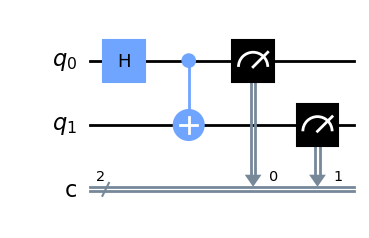

In [12]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw('mpl')

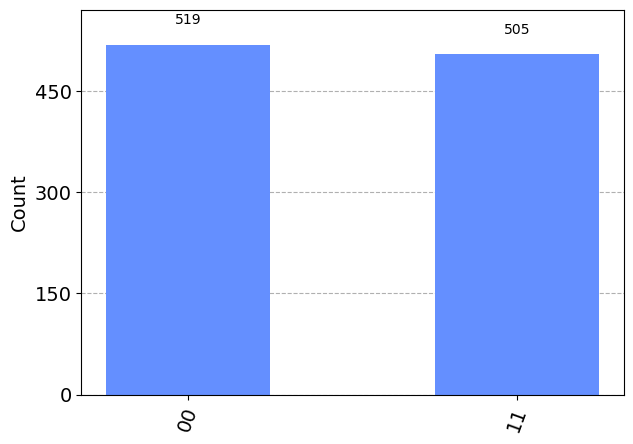

In [13]:
plot_histogram(counts)

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table